# Image registration with maxrf4u

We need to register the microscopy images to the XRD cube in order to select relevant phases. Let's try again to use the `maxrf4u`  imreg helper for this. 

**It turns out that it id quite hard to correlate XRD maps with microscopy images. Let's try to improve the segmentation with either NMF or UMAP.**

In [1]:
import maxrf4u as mx
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os

In [2]:
os.chdir('../..')

As a first step I need to load the sum-map preview image for the XRD data...

In [4]:
#!tree

In [5]:
dst_file = glob('../**/IvdW_1038646_1_rgb.png', recursive=True)[0]

In [6]:
sum_map = plt.imread(dst_file)

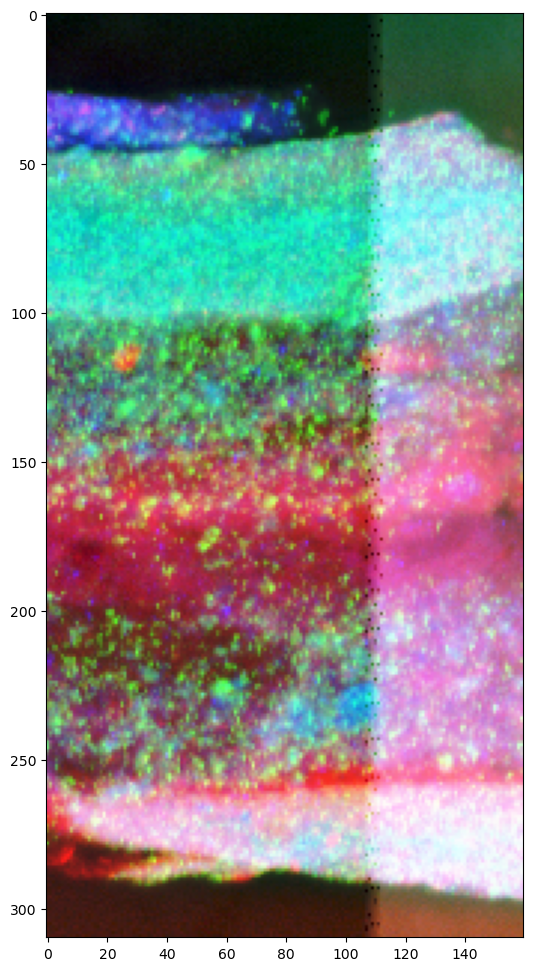

In [7]:
fig, ax = plt.subplots(figsize=[10, 12])
ax.imshow(sum_map)

Also, I need the images that need to be warped. 

In [10]:
micros_files = glob('../**/1038646-1/*.*', recursive=True)[0:4]
micros_files

['../2024-827_Mondriaan-micro-XRD-met-Inez/data/raw/microscopy/1038646-1/1038646-1 UV 20x.jpg',
 '../2024-827_Mondriaan-micro-XRD-met-Inez/data/raw/microscopy/1038646-1/1038646-1 VIS 20x.jpg',
 '../2024-827_Mondriaan-micro-XRD-met-Inez/data/raw/microscopy/1038646-1/1038646-1_1.tif',
 '../2024-827_Mondriaan-micro-XRD-met-Inez/data/raw/microscopy/1038646-1/1038646-1_1_screenshot-ESRF.png']

In [11]:
micros_ims = [plt.imread(im) for im in micros_files]

In [12]:
%matplotlib widget

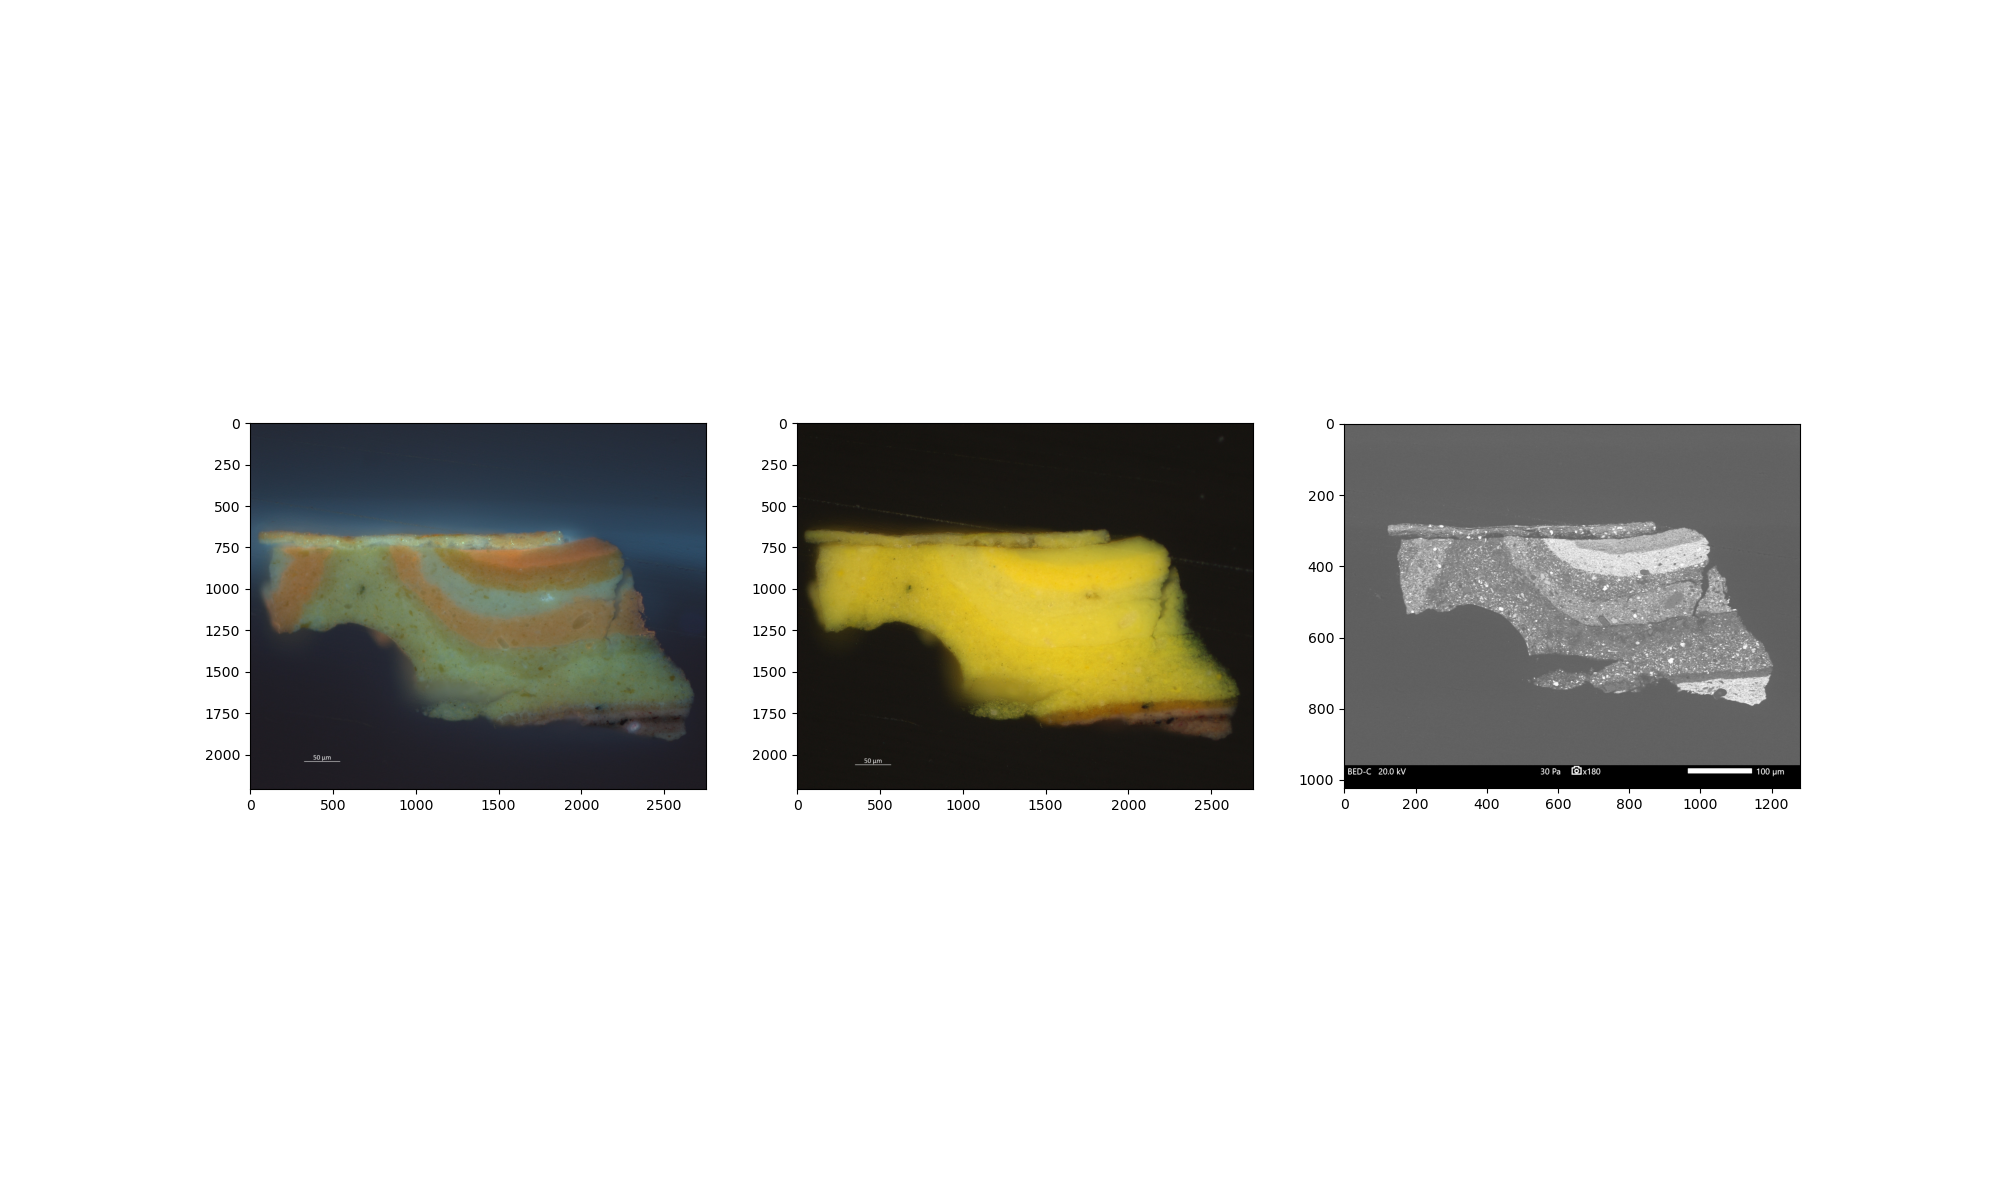

In [13]:
fig, axs = plt.subplots(ncols=3, figsize=[20, 12], squeeze=True)

for ax, im in zip(axs, micros_ims): 
    ax.imshow(im, cmap='Greys_r')
    

In [55]:
uv_im = micros_ims[0][500:2000,1100:2400]
sem_im = micros_ims[2][200:800, 700:1000]

In [56]:
imreg = mx.ImageRegistrationHelper(sem_im, sum_map)

In [57]:
imreg.show()